In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [38]:
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [224]:
t_points = pd.read_csv('tower_points.csv', sep=',', header=None, names=['x','y'])
t_s_points = pd.read_csv('tower_straight_points.csv', sep=',', header=None, names=['x','y'])

## Input data

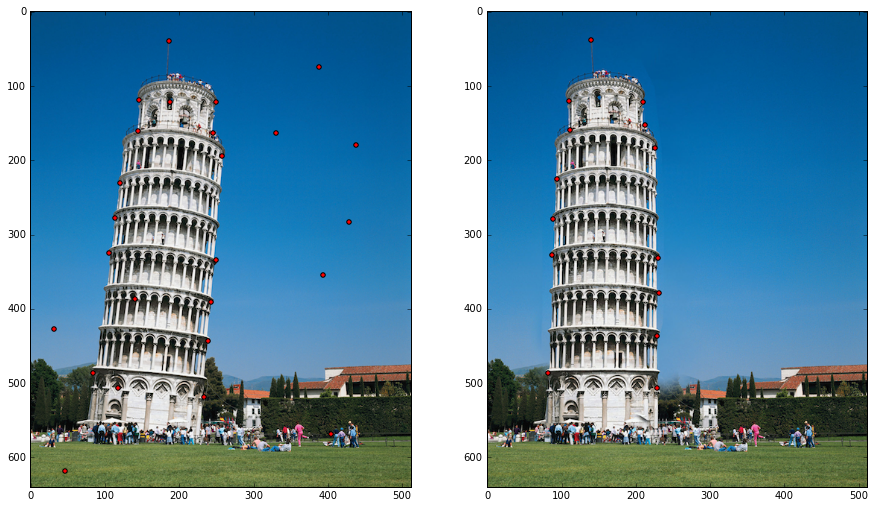

In [225]:
figsize(15,14)
subplot(1,2,1)
tower = imread('tower.png')
scatter(t_points['x'],t_points['y'],c='r')
imshow(tower)
subplot(1,2,2)
tower_s = imread('tower_straight.png')
scatter(t_s_points['x'],t_s_points['y'],c='r')
imshow(tower_s)

## Matching

In [226]:
def build_pairs(qs, ps):
    pairs = []
    for i in range(len(qs)):
        for j in range(len(ps)):
            pairs.append({'p': qs.iloc[i].values, 'q': ps.iloc[j].values, 'pid': i, 'qid': j})
    return pairs

def pair_metric(p1, p2, c_0=0.7):
    norm_1 = np.linalg.norm(p1['p'] - p2['p'])
    norm_2 = np.linalg.norm(p1['q'] - p2['q'])
    C = min(norm_1 / norm_2, norm_2 / norm_1)
    return 0 if C < c_0 else (C - c_0)**2/(1 - c_0)**2
    
def build_M(pairs):
    M = np.eye(len(pairs))
    for i in range(len(pairs)):
        for j in range(i):
            M[i,j] = pair_metric(pairs[i], pairs[j])
            M[j,i] = M[i,j]
    return M

def get_eigenvector(M):
    x = np.ones(M.shape[0])
    for i in range(100):
        x = np.dot(M, x)
        x /= np.linalg.norm(x)
    return x

def build_cluster(im1_points, im2_points):
    pairs = build_pairs(im1_points, im2_points)
    M = build_M(pairs)
    e = get_eigenvector(M)
    cluster = set()
    for pair_id, val in pd.Series(e).sort_values(ascending=False).iteritems():
        valid = True
        for cpair_id in cluster:
            if M[pair_id, cpair_id] < 0.01:
                valid &= False
            if pairs[pair_id]['pid'] == pairs[cpair_id]['pid']:
                valid &= False
            if pairs[pair_id]['qid'] == pairs[cpair_id]['qid']:
                valid &= False
        if valid:
            cluster.add(pair_id)
    return map(lambda pair_id: (pairs[pair_id]['pid'], pairs[pair_id]['qid']), cluster)

In [227]:
pairs = build_cluster(t_points, t_s_points)

## Visualization

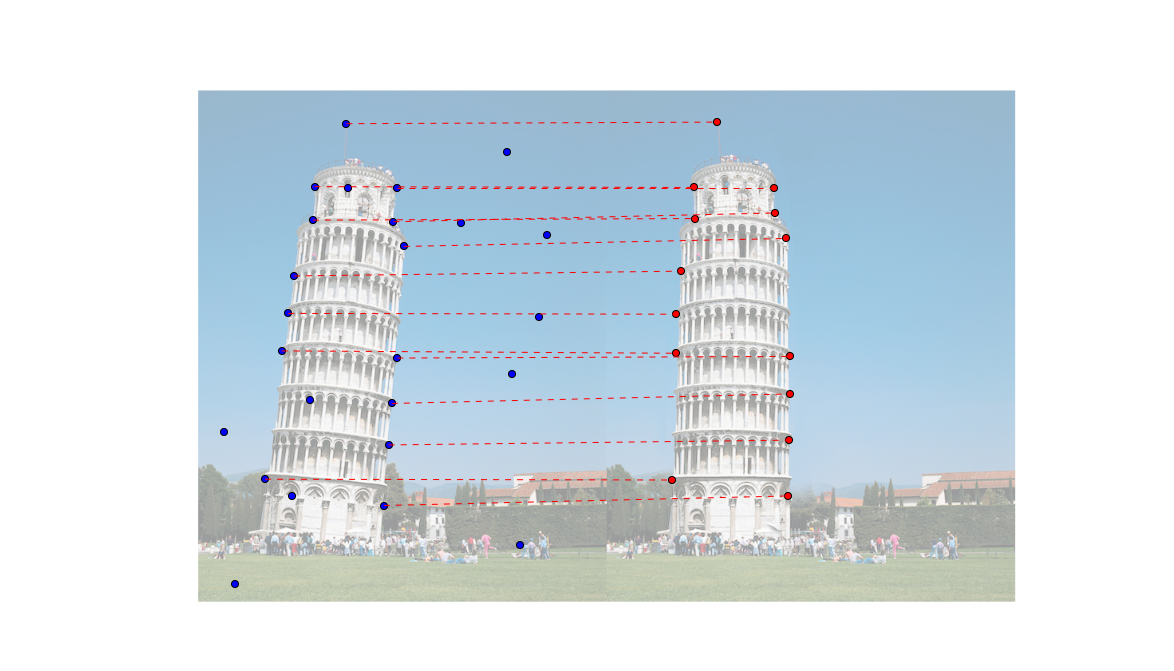

In [228]:
figsize(20,20)
towers = np.concatenate((tower, tower_s), axis=1)
imshow(towers,alpha=0.4)
scatter(t_points['x'],t_points['y'],c='b',s=50)
scatter(t_s_points['x'] + tower.shape[1],t_s_points['y'],c='r',s=50)
for p in pairs:
    x = []
    y = []
    x.append(t_points['x'].iloc[p[0]])
    x.append(t_s_points['x'].iloc[p[1]] + tower.shape[1])
    y.append(t_points['y'].iloc[p[0]])
    y.append(t_s_points['y'].iloc[p[1]])
    plt.plot(x,y, 'red', ls='--')
plt.axis('off')
plt.show()

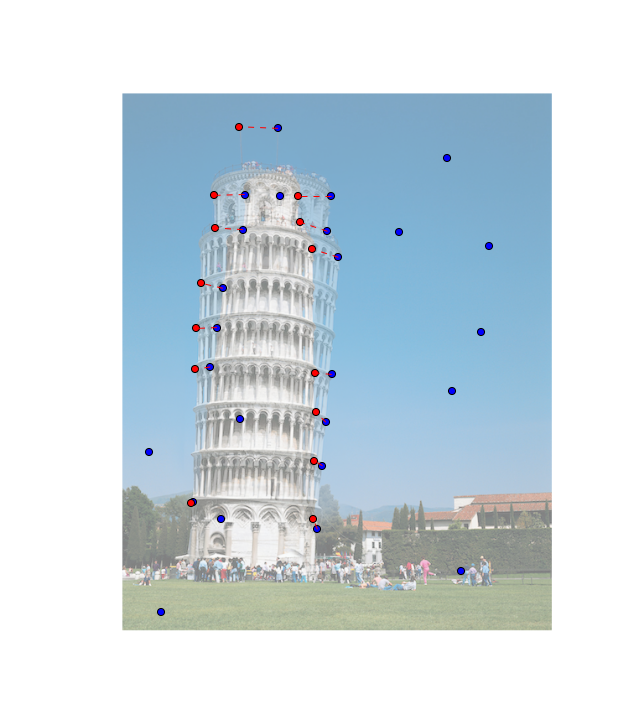

In [233]:
figsize(12,12)
imshow(tower,alpha=0.3)
imshow(tower_s,alpha=0.3)
scatter(t_points['x'],t_points['y'],c='b',s=50)
scatter(t_s_points['x'],t_s_points['y'],c='r',s=50)
for p in pairs:
    x = []
    y = []
    x.append(t_points['x'].iloc[p[0]])
    x.append(t_s_points['x'].iloc[p[1]])
    y.append(t_points['y'].iloc[p[0]])
    y.append(t_s_points['y'].iloc[p[1]])
    plt.plot(x,y, 'red', ls='--')
plt.axis('off')
plt.show()

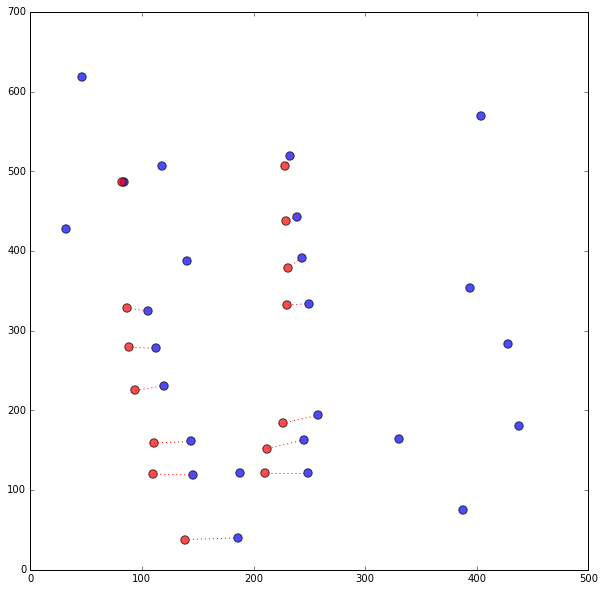

In [229]:
figsize(10,10)
scatter(t_points['x'],t_points['y'],c='b',s=70,alpha=0.7)
scatter(t_s_points['x'],t_s_points['y'],c='r',s=70,alpha=0.7)
for p in pairs:
    x = []
    y = []
    x.append(t_points['x'].iloc[p[0]])
    x.append(t_s_points['x'].iloc[p[1]])
    y.append(t_points['y'].iloc[p[0]])
    y.append(t_s_points['y'].iloc[p[1]])
    plt.plot(x,y, 'r:')
plt.show()